In [7]:
import tkinter as tk

class RocketTracker:
    def __init__(self, root):
        self.root = root
        self.root.title("Rocket Trajectory Tracker")
        
        # Canvas setup
        self.canvas = tk.Canvas(root, width=500, height=500, bg='black')
        self.canvas.pack()
        
        # Rocket properties (starts at center)
        self.x, self.y = 250, 250
        self.step_size = 10  # Movement distance per key press
        
        # Create rocket (as a point)
        self.rocket = self.canvas.create_oval(
            self.x-3, self.y-3, self.x+3, self.y+3, 
            fill='red', outline='white'
        )
        
        # Store trajectory points
        self.trajectory = [(self.x, self.y)]
        self.trajectory_line = None
        
        # Position label
        self.position_label = tk.Label(
            root, text=f"Position: ({self.x}, {self.y})", 
            font=('Arial', 12), fg='white', bg='black'
        )
        self.position_label.pack()
        
        # Key bindings
        self.root.bind('<Up>', self.move_up)
        self.root.bind('<Down>', self.move_down)
        self.root.bind('<Left>', self.move_left)
        self.root.bind('<Right>', self.move_right)
        
        # Clear button
        tk.Button(
            root, text="Clear Trajectory", command=self.clear_trajectory,
            bg='black', fg='white'
        ).pack()
    
    def move_up(self, event):
        self.y -= self.step_size
        self.update_position()
    
    def move_down(self, event):
        self.y += self.step_size
        self.update_position()
    
    def move_left(self, event):
        self.x -= self.step_size
        self.update_position()
    
    def move_right(self, event):
        self.x += self.step_size
        self.update_position()
    
    def update_position(self):
        # Update rocket position
        self.canvas.coords(
            self.rocket, 
            self.x-3, self.y-3, self.x+3, self.y+3
        )
        
        # Add current position to trajectory
        self.trajectory.append((self.x, self.y))
        
        # Update trajectory line
        if len(self.trajectory) > 1:
            if self.trajectory_line:
                self.canvas.delete(self.trajectory_line)
            self.trajectory_line = self.canvas.create_line(
                self.trajectory, fill='cyan', width=1
            )
        
        # Update position label
        self.position_label.config(text=f"Position: ({self.x}, {self.y})")
    
    def clear_trajectory(self):
        if self.trajectory_line:
            self.canvas.delete(self.trajectory_line)
            self.trajectory_line = None
        
        # Reset position and recreate rocket
        self.x, self.y = 250, 250
        self.canvas.coords(self.rocket, self.x-3, self.y-3, self.x+3, self.y+3)
        
        # Reset trajectory
        self.trajectory = [(self.x, self.y)]
        
        # Update position label
        self.position_label.config(text=f"Position: ({self.x}, {self.y})")

# Create and run the application
root = tk.Tk()
app = RocketTracker(root)
root.mainloop()

In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import numpy as np

class Rocket:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
        self.trajectory = [(self.x,self.y)]  # Store all positions
    
    def move_up(self, step=1):
        self.y += step
        self._update_trajectory()
    
    def move_down(self, step=1):
        self.y -= step
        self._update_trajectory()
    
    def move_right(self, step=1):
        self.x += step
        self._update_trajectory()
    
    def move_left(self, step=1):
        self.x -= step
        self._update_trajectory()
    
    def _update_trajectory(self):
        self.trajectory.append((self.x, self.y))  # Add current position to trajectory

# Initialize rocket
rocket = Rocket()
position_label = widgets.Label(value=f"Position: ({rocket.x}, {rocket.y})")

# Create control buttons with consistent styling
button_style = {'width': '50px', 'height': '40px'}
btn_up = widgets.Button(description="↑", layout=button_style, style={'button_color': 'lightgray'})
btn_down = widgets.Button(description="↓", layout=button_style, style={'button_color': 'lightgray'})
btn_left = widgets.Button(description="←", layout=button_style, style={'button_color': 'lightgray'})
btn_right = widgets.Button(description="→", layout=button_style, style={'button_color': 'lightgray'})
btn_clear = widgets.Button(description="Clear", 
                         layout={'width': '60px', 'height': '40px'},
                         style={'button_color': '#ff9999'})

# Create output area for the plot
plot_output = widgets.Output()
plot_output.layout = widgets.Layout(margin='0 0 0 20px',border='2px solid black') 

# Layout controller
row1 = widgets.HBox([widgets.Label(''), btn_up, widgets.Label('')],
                    layout=widgets.Layout(justify_content='center'))
row2 = widgets.HBox([btn_left, btn_clear, btn_right],
                    layout=widgets.Layout(justify_content='center'))
row3 = widgets.HBox([widgets.Label(''), btn_down, widgets.Label('')],
                    layout=widgets.Layout(justify_content='center'))

controller = widgets.VBox([row1, row2, row3],
                          layout=widgets.Layout(margin='0px'))

# Output and final layout
output = widgets.Output()
# Button event handlers
def update_display():
    with plot_output:
        clear_output(wait=True)
        plt.figure(figsize=(5, 5))
        plt.xlim(-10, 10)
        plt.ylim(-10, 10)
        # Définir des ticks tous les 1 sur x et y
        plt.xticks(np.arange(-10, 11, 1))
        plt.yticks(np.arange(-10, 11, 1))
        
        # Ensure we plot the trajectory from the very beginning
        if len(rocket.trajectory) >= 1:
            x, y = zip(*rocket.trajectory)
            plt.plot(x, y, 'ob-', alpha=0.5)  # Blue trace line
        # Plot the current position (always plot the first position as well)
        plt.plot(rocket.x, rocket.y, 'ro', markersize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.title("Rocket Trajectory")
        plt.show()
    
    position_label.value = f"Position: ({rocket.x}, {rocket.y}) | Steps: {len(rocket.trajectory)-1}"

def on_up(b):
    rocket.move_up()
    update_display()

def on_down(b):
    rocket.move_down()
    update_display()

def on_left(b):
    rocket.move_left()
    update_display()

def on_right(b):
    rocket.move_right()
    update_display()

def on_clear(b):
    rocket.x,rocket.y=0,0 # Clear trajectory
    rocket.trajectory=[(0,0)]
    update_display()

# Assign handlers
btn_up.on_click(on_up)
btn_down.on_click(on_down)
btn_left.on_click(on_left)
btn_right.on_click(on_right)
btn_clear.on_click(on_clear)

# Create controller layout with centered clear button
controller = widgets.VBox([position_label,
    widgets.HBox([widgets.Label(''), btn_up, widgets.Label('')]),
    widgets.HBox([btn_left, btn_clear, btn_right]),
    widgets.HBox([widgets.Label(''), btn_down, widgets.Label('')])
], layout=widgets.Layout(align_items='center', border='2px solid black',
    padding='10px'))

# Create main layout with controller left and plot right, with frame around both
main_layout = widgets.HBox([
    controller,
    plot_output,
], layout=widgets.Layout(
    justify_content='space-between',
    width='100%',
    border='2px solid black',
    padding='10px'
))
# Adjusting margin for the controller to add horizontal space
main_layout.layout = widgets.Layout(margin='0 40px 0 0')  # Right margin of 40px
update_display()

# Display everything
display(widgets.VBox([
    main_layout
]))

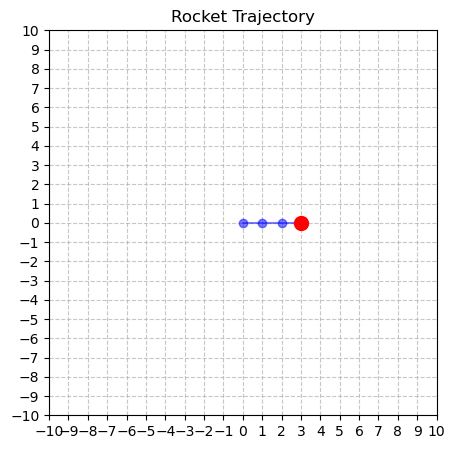

In [47]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np

class Rocket:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
        self.trajectory = [(self.x, self.y)]

    def move_up(self, step=1):
        self.y += step
        self._update_trajectory()

    def move_down(self, step=1):
        self.y -= step
        self._update_trajectory()

    def move_right(self, step=1):
        self.x += step
        self._update_trajectory()

    def move_left(self, step=1):
        self.x -= step
        self._update_trajectory()

    def _update_trajectory(self):
        self.trajectory.append((self.x, self.y))

    def reset(self):
        self.x, self.y = 0, 0
        self.trajectory = [(self.x, self.y)]

# ------------------ Interface ------------------

rocket = Rocket()

def update_display():
    ax.clear()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_xticks(np.arange(-10, 11, 1))
    ax.set_yticks(np.arange(-10, 11, 1))
    ax.grid(True, linestyle='--', alpha=0.7)

    if len(rocket.trajectory) >= 1:
        x, y = zip(*rocket.trajectory)
        ax.plot(x, y, 'ob-', alpha=0.5)
    ax.plot(rocket.x, rocket.y, 'ro', markersize=10)
    ax.set_title("Rocket Trajectory")
    canvas.draw()

    position_label.config(text=f"Position: ({rocket.x}, {rocket.y})")

def move_up():
    rocket.move_up()
    update_display()

def move_down():
    rocket.move_down()
    update_display()

def move_left():
    rocket.move_left()
    update_display()

def move_right():
    rocket.move_right()
    update_display()

def clear():
    rocket.reset()
    update_display()

# Create main window
root = tk.Tk()
root.title("Rocket Trajectory Controller")

# Position label
position_label = ttk.Label(root, text=f"Position: ({rocket.x}, {rocket.y})", font=("Arial", 12))
position_label.pack(pady=5)

# Matplotlib figure
fig, ax = plt.subplots(figsize=(5, 5))
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack(side=tk.RIGHT, padx=10, pady=10)
update_display()

# Controller frame
control_frame = tk.Frame(root)
control_frame.pack(side=tk.LEFT, padx=10, pady=10)

# Grid layout to match your original design
btn_up = ttk.Button(control_frame, text="↑", width=5, command=move_up)
btn_down = ttk.Button(control_frame, text="↓", width=5, command=move_down)
btn_left = ttk.Button(control_frame, text="←", width=5, command=move_left)
btn_right = ttk.Button(control_frame, text="→", width=5, command=move_right)
btn_clear = ttk.Button(control_frame, text="Clear", width=5, command=clear)
# Bind keyboard events
root.bind("<Up>", move_up())
root.bind("<Down>",move_down())
root.bind("<Left>", move_left())
root.bind("<Right>", move_right())
root.bind("<c>", clear())

# Positioning buttons in a 3x3 grid
tk.Label(control_frame, text="").grid(row=0, column=0)
btn_up.grid(row=0, column=1)
tk.Label(control_frame, text="").grid(row=0, column=2)

btn_left.grid(row=1, column=0)
btn_clear.grid(row=1, column=1)
btn_right.grid(row=1, column=2)

tk.Label(control_frame, text="").grid(row=2, column=0)
btn_down.grid(row=2, column=1)
tk.Label(control_frame, text="").grid(row=2, column=2)

root.mainloop()
